**Credit Card Fraud Detection - Giriraju B**

Importing libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [151]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [152]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [154]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [155]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

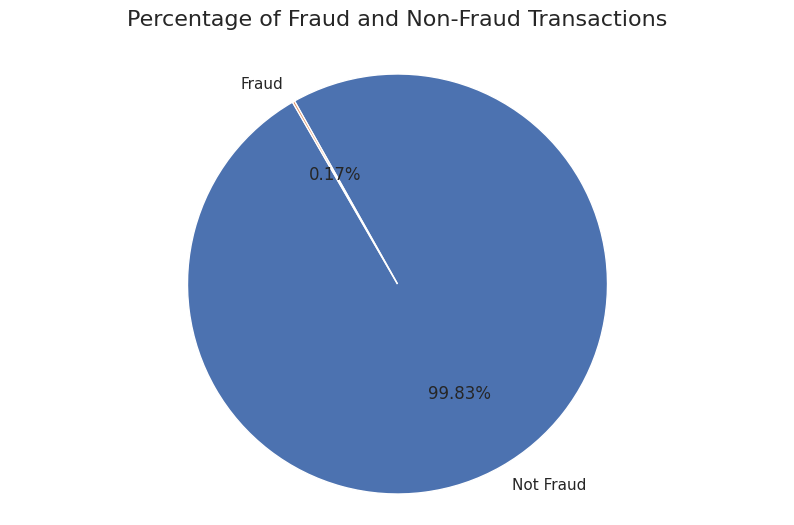

In [156]:
labels = 'Not Fraud', 'Fraud'
sizes = [df.Class[df['Class'] == 0].count(), df.Class[df['Class'] == 1].count()]
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=120)
ax1.axis('equal')
title = "Percentage of Fraud and Non-Fraud Transactions"
plt.title(title, size=16, pad=20)
plt.show()

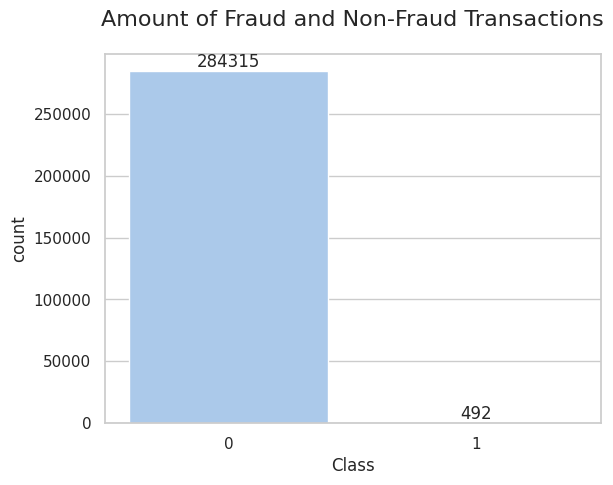

In [157]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Class', data=df, order=[0, 1], label='Count', palette='pastel')
counts = df['Class'].value_counts()
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
title = "Amount of Fraud and Non-Fraud Transactions"
ax.set_title(title, size=16)
plt.title(title, size=16, pad=20)
plt.show()

This is highly unbalanced. 0 is Normal transaction and 1 is Fraudlent Transaction

In [158]:
Legit=df[df.Class==0]
Fraud=df[df.Class==1]

In [159]:
print(Legit.shape)
print(Fraud.shape)

(284315, 31)
(492, 31)


<ipython-input-184-8730e128497f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


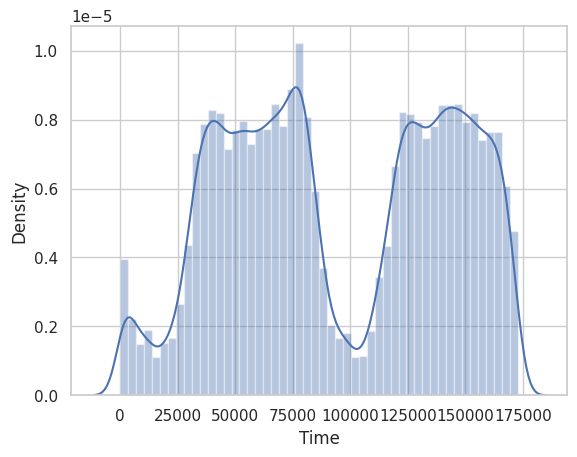

In [184]:
sns.distplot(df['Time'])
plt.show()

In [160]:
Legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [161]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [162]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


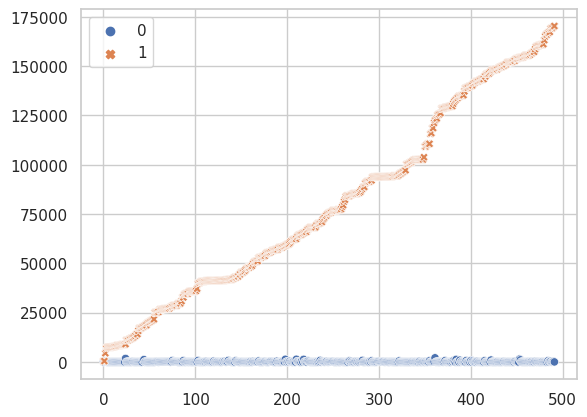

In [183]:
sns.scatterplot(df[df['Class']==1][['Amount','Time']].values)
plt.show()

**Equaling the Fraud & Legit numbers**

In [163]:
Legit_sample=Legit.sample(n=492)

**Contatenating Two Dataframes**

In [164]:
df.new=pd.concat([Legit_sample,Fraud],axis=0)

<ipython-input-164-31066150e47b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.new=pd.concat([Legit_sample,Fraud],axis=0)


**Normal Transaction**

In [165]:
df.new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25542,33659.0,0.768339,-1.528915,0.671929,-0.784746,-1.751015,-0.488586,-0.500464,0.014844,2.531866,...,0.133782,0.291348,-0.359974,0.489697,0.526475,0.147203,0.007573,0.059866,249.00,0
158281,111113.0,2.105250,0.185232,-1.394275,0.307472,0.541140,-0.681034,0.166989,-0.441286,1.831992,...,0.112498,0.793382,-0.027106,0.476600,0.416848,-0.480340,-0.013822,-0.052981,1.00,0
162569,115219.0,2.110837,-1.115878,0.380569,-0.775945,-1.647459,-0.257212,-1.577400,0.026295,0.441391,...,0.442233,1.457486,0.177474,-0.011693,-0.380001,-0.088345,0.068258,-0.029552,9.99,0
252408,155793.0,2.067731,0.177746,-1.684627,0.423875,0.430133,-0.890014,0.215259,-0.260619,0.434835,...,-0.356530,-0.909479,0.336941,0.578458,-0.250807,0.168091,-0.060726,-0.028844,4.49,0
278725,168388.0,1.991229,-0.032907,-2.047936,0.153355,0.634608,-0.323808,0.058439,-0.083924,0.762592,...,-0.243854,-0.494031,0.023766,-1.211285,0.033012,-0.043332,-0.008892,-0.033804,35.38,0


**Fraudlent Transaction**

In [166]:
df.new.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [167]:
df.new["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [168]:
df.new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92404.668699,-0.097676,-0.017284,-0.021619,0.003334,-0.023866,-0.085432,0.005330,-0.064021,-0.011526,...,-0.021644,-0.079637,0.045524,-0.053218,0.029643,0.000817,0.003066,0.023885,0.017528,95.477276
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the datas into Features and Targets

In [169]:
X= df.new.drop(columns='Class',axis=1)
Y= df.new['Class']

In [170]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
25542    33659.0  0.768339 -1.528915  0.671929 -0.784746 -1.751015 -0.488586   
158281  111113.0  2.105250  0.185232 -1.394275  0.307472  0.541140 -0.681034   
162569  115219.0  2.110837 -1.115878  0.380569 -0.775945 -1.647459 -0.257212   
252408  155793.0  2.067731  0.177746 -1.684627  0.423875  0.430133 -0.890014   
278725  168388.0  1.991229 -0.032907 -2.047936  0.153355  0.634608 -0.323808   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [171]:
print(Y)

25542     0
158281    0
162569    0
252408    0
278725    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


**Training & Testing Data**

In [172]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [173]:
print(X.shape,X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


**Model Training**

Logistic Regression

In [174]:
model=LogisticRegression()

In [175]:
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [176]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

In [177]:
print("Accuracy Score is : ",training_data_accuracy)

Accuracy Score is :  0.9212198221092758


In [178]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [179]:
print("Accuracy Score is : ",test_data_accuracy)

Accuracy Score is :  0.8883248730964467


                                                                **Thank You !!**